# UBCO Data 301 Group 11 
## Milestone 2 Submission - Task 4 Group Data Analysis
## Wesley Burchnall, Andy McLean and Abirinder Brar


## Research Questions Introduction
Our groups motivation in researching is inherently self-interest. Abirinder, Andy and Wesley are all interested in purchasing properly in the near future. Ideally, we'd like to purchase during a time were prices are low, or have just dropped (crashed) and hold onto the property as value returns to normal to pay less in mortgage payments and see better return on our investment. Our group hopes to avoid purchasing immediately before a crash and losing substantial equity.

Throughout the past 40 years of Canadian real-estatae, the market has bubbled and crashed cyclicly several times. The first crashes was in Eastern Canada in the 1980s, followed by 1993 and then 2008. Data from the 1980s is less precise and reliable in terms of frequency of measurement and completeness so the scope of this analysis will be examining thteh 1993 and 2008 crashes. Our goal is to gather data to help us make smarter real estate investments through the following sets of questions.

## Research Questions for Our Group
1. Is now a good time to purchase real estate in Kelowna? 
     - Is a Real Estate crash imminent?
     - How long does recovery from a crash take/how many years will we have to make a purchase before prices rebound?
2. Will different types of real estate be effected differently by a market crash? 
     - Does a house devaluate more than an apartment or townhouse?
     - Do different areas depreciate fairly linearly across BC and Canada when a market crash occurs?
3. Individual slants on research (personal interest - motivation)
     - What will happen in Vancouver? (Wesley - bound by threat of girlfriend's ire, we cannot leave BC but she is willing to consider relocating within.)
     - What will happen in Kelowna? (Abirinder -- is well setup in Kelowna with wife, kids and employment. Not seeking to move.)
     - What will happen Canada-wide? (Andy -- most willing to relocate as no current relationship or kids/wife)

### Importing the package that contains our project functions

In [23]:
import seaborn as sns
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import sys
sys.path.append('..')
from scripts import project_fuctions as pf

### Loading the data

In [24]:
### Loading the DataFrames for EDA
masterDF = pf.load_and_process()
MLS_BC_HPI_DF = pf.loadMLSRegionalHPIData()

## RQ1 - Exploring the data through a custom-made describe function that features breakdown by decade

### An Introduction

The variables I have choosen to explore in my EDA are new house prices, prime interest rate for mortgages and total savings as a % of GDP; each with its own reasoning why these may be good indicators of future crashes. First, seeing the change in house prices before previous crashes in 93 and 2008, and shape/time the subsequent recovery took, may provide some indicator of what housing price fluxation leading up to a crash will look like. Secondly, low prime interest rates for mortgages effect the cost of borrowing and allow customers to spend-more-money with a lower monthly payment.  Third, most mortgages require a downpayment. This is usually reflective in Canadians creating a store of money in savings which is then used as a down payment. A lack of Canadian savings, might necessitate difficulty getting mortgage approval and be related to a market-crash.

#### Examining Prime Rate - How does Historical Prime Rate compare to today?
#### Graphical Examination

Figure 1 and 2: A graph of changes in Prime Interest rate for mortgages over time as bar and scatter plots. A general trend of decreasing interest rates from the 80s to 00s. Around 00s, the decrease stalls and interest rates remain fairly flat. There are noteable spikes in interesting rates that break from the general trend downards. The first is around 1989-1991 just prior to the 1993 crash. The second is three years of interest rate rises from 2005 to 2007 prior to the 2008 crash. Interest rates may be beginning to rise in 2018 onwards. 

Possible explanation for this behavior is interest rates effect buying habits. When interest rates increase, the cost of mortgage payments at current housing prices will also correspondingly increase. This would result in less ability to finance expensive homes and could result in a downward swing in housing prices. 

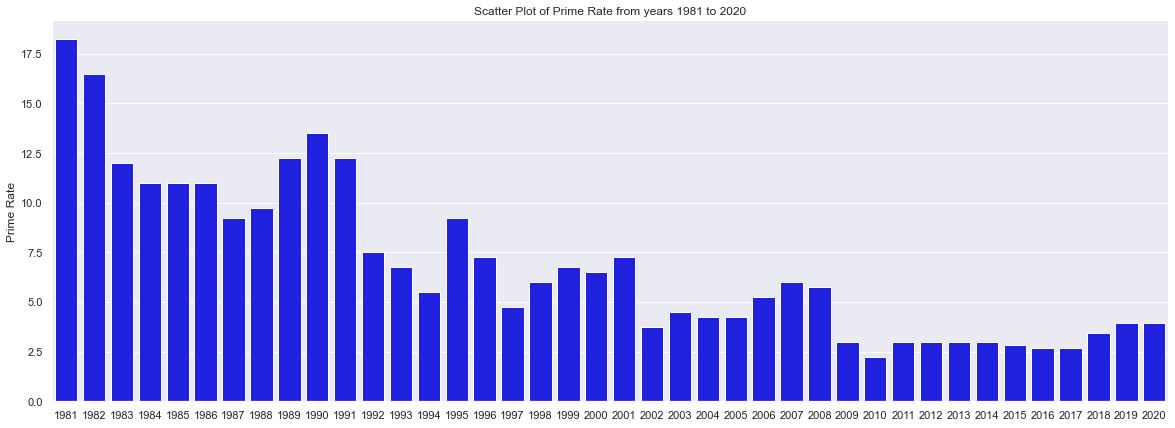

In [25]:
pf.barPlotOverTime(masterDF,'Prime Rate',41,25,12,'blue')

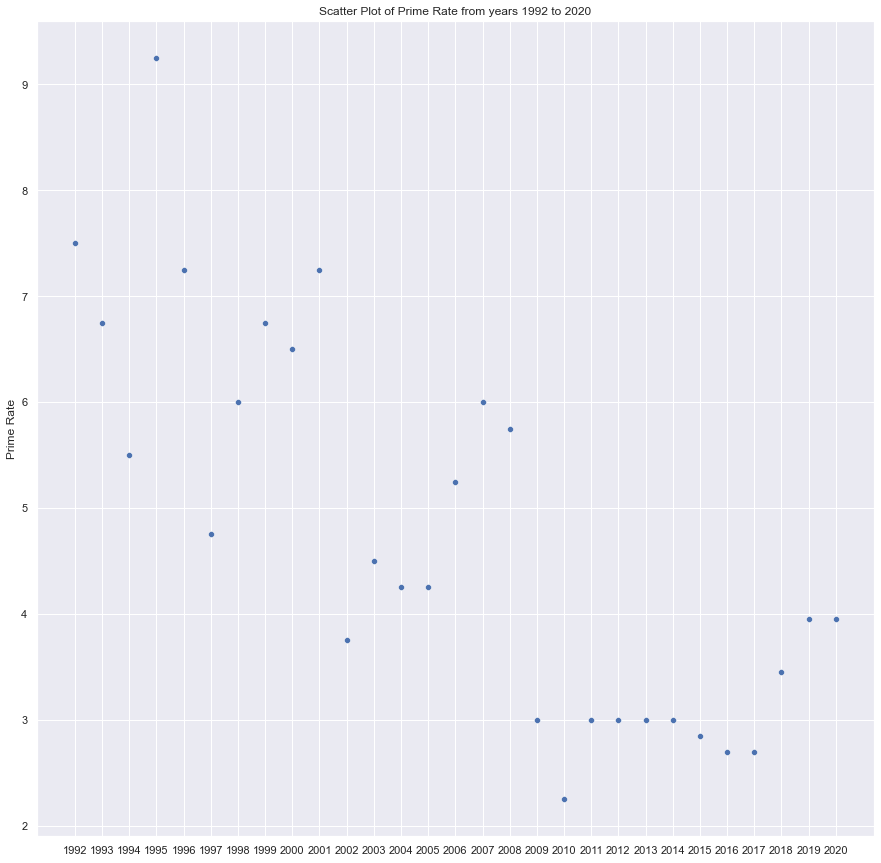

In [26]:
pf.scatterPlotOverTime(masterDF,'Prime Rate',30,15,15)

#### Statistical Examination

In [27]:
pf.printStatTableByDecade(masterDF,'Prime Rate')

A Summary of Stats Prime Rate By Decades in Tabular Form
--------------------------------------------------------
Decade | Mean	 |  Min   |  Max |
80s    | 12.333	 | 9.25	 | 18.25 |
90s    | 7.95	 | 4.75	 | 13.5 |
00s    | 5.05	 | 3.0	 | 7.25 |
10s    | 2.99	 | 2.25	 | 3.95 |
20s    | 3.2	 | 2.45	 | 3.95 |


Observation: Downward trends from 80s to 10s in Min, Max and Mean Prime Rate of Interest for Mortgages. This confirms trend shown in Figure 1 and 2 in aggregate. Additionally, in 2020s, we can see the max and min did not decrease, and the mean actually increased.

#### Examining BC New Housing Price Index - How does Historical Housing Prices compare to today?
#### Graphical Examination

Figure 3: A graph of BC New House prices over time. We can see the 2008 housing crash reflected in the prices of new houses in BC. There is a sharp increase, leading up to 2008, followed by a period of gradual decrease until 2015. The recovery period was approximately 7 years. The 1993 crash in about 8 years until 2001 to see an increase in prices. We also see a very sharp increase from 2015 to 2018 that mirrors 2003 to 2008's continual increase. We also see a leveling in 2019 and even a small drop in 2020. If that is the start of another crash, we can expect no new growth or decreases for approximately 7-8 years.

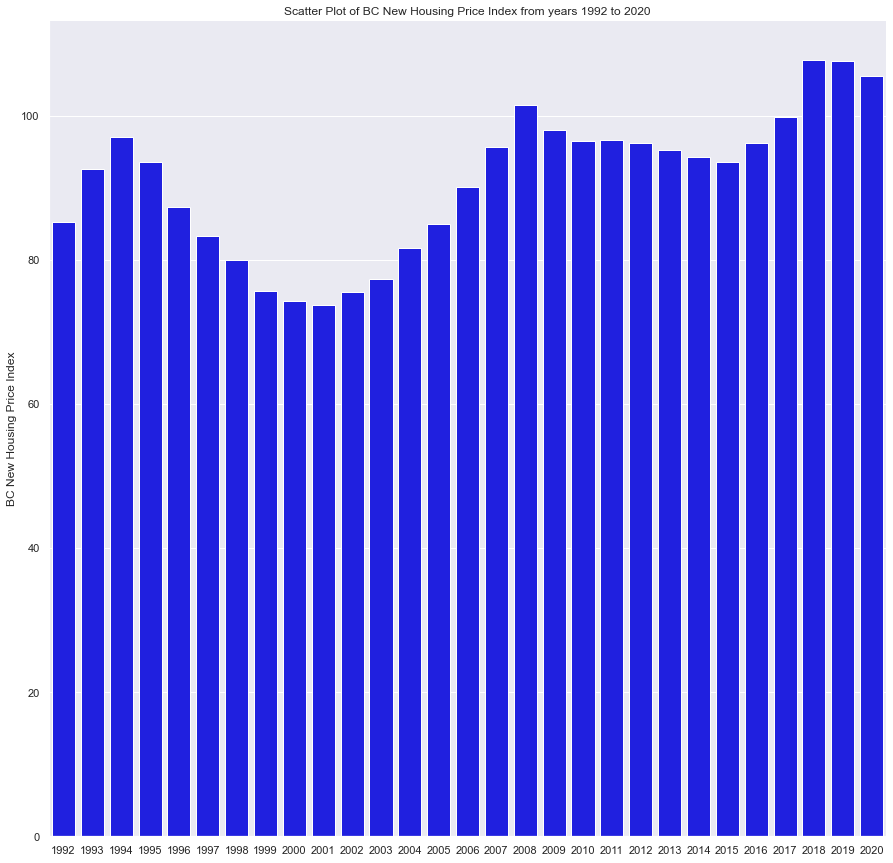

In [28]:
pf.barPlotOverTime(masterDF,'BC New Housing Price Index',30,15,15,'blue')

#### Statistical Examination

In [29]:
pf.printStatTableByDecade(masterDF,'BC New Housing Price Index')

A Summary of Stats BC New Housing Price Index By Decades in Tabular Form
------------------------------------------------------------------------
Decade | Mean	 |  Min   |  Max |
80s    | 70.3	 | 66.3	 | 76.9 |
90s    | 86.99	 | 75.7	 | 97.1 |
00s    | 85.31	 | 73.7	 | 101.5 |
10s    | 98.42	 | 93.6	 | 107.8 |
20s    | 108.9	 | 105.5	 | 112.3 |


Examining the data table above, we can see that mean, minimum and maximum housing prices rose from the 80s to 90, 00s to 10s and 10s to 2020s. We did however see a stall in the decade of 90s to 00s. As market crashes occured in '93 and 2008 respectively. The decreate in 00s housing prices compared to 90s, is reflective of the slump we say in Figure 3.

#### Examining Gross Savings - How does Gross Savings as a % of GDP change over time?
#### Graphical Examination

Figure 4: A graph of changes in Canadian Savings as a Percentage of GDP. Observations include a large-drop occurs in average canadian in 1991 and subsequent drop in 1992, just prior to the 1993 crash.  Prior to the 2008 crash, we do not see a sharp drop but zero-growth (or slightly negative growth) occurs. From 2015 to 2020, we see no growth and a slight decrease in 2020.

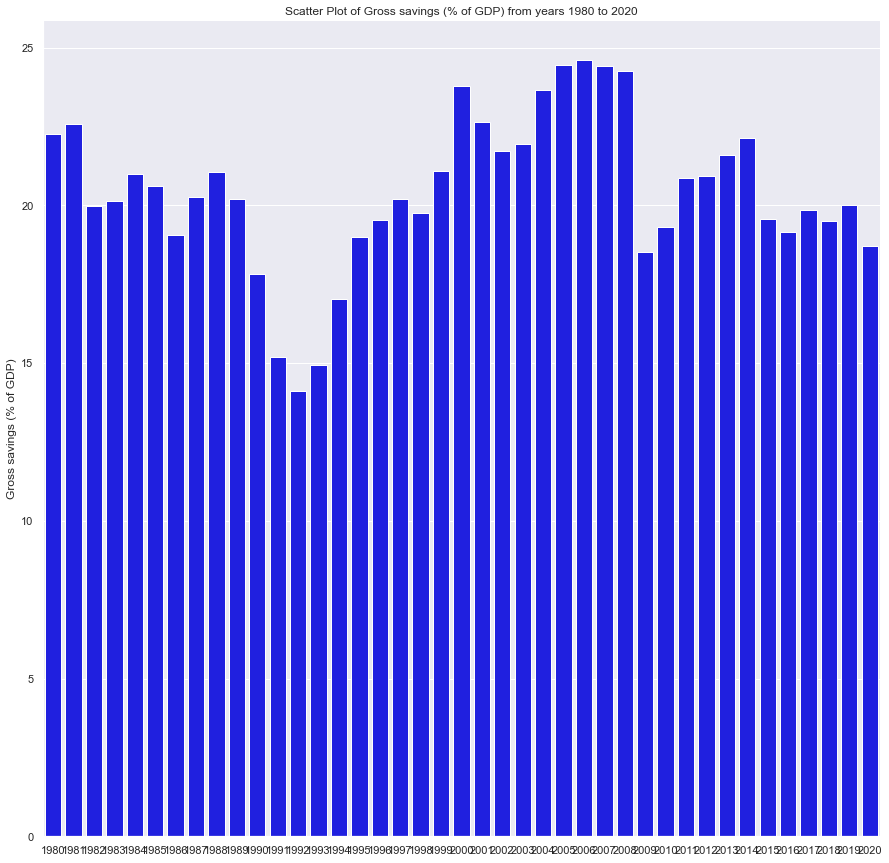

In [30]:
pf.barPlotOverTime(masterDF,'Gross savings (% of GDP)',42,20,7,'blue')

#### Statistical Examination

In [31]:
pf.printStatTableByDecade(masterDF,'Gross savings (% of GDP)')

A Summary of Stats Gross savings (% of GDP) By Decades in Tabular Form
----------------------------------------------------------------------
Decade | Mean	 |  Min   |  Max |
80s    | 20.71	 | 19.046	 | 22.568 |
90s    | 17.87	 | 14.104	 | 21.096 |
00s    | 22.998	 | 18.52	 | 24.617 |
10s    | 20.291	 | 19.146	 | 22.148 |
20s    | 18.719	 | 18.719	 | 18.719 |


Examining the data table above, observe the lowest mean savings were in the 90s and 20s. Additionally, the two lowest periods of savings, were decades which coincide with real estate crashes; the 90s and 00s.  The third lowest is current-decade. If low-savings, hinders purchasers from taking out mortgages and may indicate a looming crash, savings are as bad now as they were in 2008.

### Conclusion of Exploratory Data Analysis

All three variables examined in the EDA, new house prices, prime interest rate for mortgages and total savings as a % of GDP, each experienced changes leading up to 1993 and 2008 real estate crashes. Houses prices say a rise for a few years leading up to the crash and the crash remained for  and these crashes 

## RQ1 - Exploring a multiple linear regression of the effect of Prime Interest Rate and Total Savings of Canadians as Percentage of GDP on BC New Housing Prices 

### Examining the effects of prime interest rate increases to 4% and 6% by 0.5% step size and total savings decreases from 18% to 14% by 1% step size.

In [32]:
X = pf.limitYears(masterDF,35).transpose()[['Prime Rate', 'Gross savings (% of GDP)']]
Y = pf.limitYears(masterDF,35).transpose()['BC New Housing Price Index']

ourMultipleLinearRegressionModel = linear_model.LinearRegression()
ourMultipleLinearRegressionModel.fit(X, Y)

print('Linear Intercept: \n', ourMultipleLinearRegressionModel.intercept_)
print('Linear Coefficients: \n', ourMultipleLinearRegressionModel.coef_)

print('\nA negative coefficient indicates increase the associated variable decreases the cost of new housing in BC.')
print('A positive coefficient indicates increase the associated variable increases the cost of new housing in BC.\n')

predictionPrimeRates = [4.00,4.50,5.00,5.50,6.00]
predictionGrossSavingPercentages = [18.00,17.00,16.00,15.00,14.00]

print("Prime Rate | Savings as % of GDP | Predicted BC New Housing Price Index")

for rate in predictionPrimeRates:
    for percentage in predictionGrossSavingPercentages:
        print (str(rate) + "        | " + str(percentage) + "                | ", str(round(ourMultipleLinearRegressionModel.predict([[rate , percentage]])[0],4)))




Linear Intercept: 
 128.80686347462242
Linear Coefficients: 
 [-2.08881392 -1.36497326]

A negative coefficient indicates increase the associated variable decreases the cost of new housing in BC.
A positive coefficient indicates increase the associated variable increases the cost of new housing in BC.

Prime Rate | Savings as % of GDP | Predicted BC New Housing Price Index
4.0        | 18.0                |  95.8821
4.0        | 17.0                |  97.2471
4.0        | 16.0                |  98.612
4.0        | 15.0                |  99.977
4.0        | 14.0                |  101.342
4.5        | 18.0                |  94.8377
4.5        | 17.0                |  96.2027
4.5        | 16.0                |  97.5676
4.5        | 15.0                |  98.9326
4.5        | 14.0                |  100.2976
5.0        | 18.0                |  93.7933
5.0        | 17.0                |  95.1582
5.0        | 16.0                |  96.5232
5.0        | 15.0                |  97.8882
5.0      

C:\Users\240sx\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


## RQ#2 - Will different types of real estate be effected differently by a market crash?
##        Does a house devaluate more than an apartment or townhouse?
##        Do different areas depreciate fairly linearly across BC and Canada when a market crash occurs?


### Introduction

In my research question I am looking at differing types of dwellings and how each one may be impacted differently with a housing market crash, particularly comparing houses, townhouses and apartments, and how each geographical location may differ in terms of value.


### Graphical Examination

Comparing housing prices in Canada versus Vancouver and Kelowna for various dwellings.
This is a graphical examination of the MLS regional Housing Price Index in a monthly timeframe betwee 2005-2020, so we can graphically differentiate and visualize how the 2008 housing market crash coincides with various housing prices in Canada, Vancouver, and Kelowna.


In [36]:
DF_main = pf.load_and_process()
housePrices_DF = pf.loadMLSRegionalHPIData()
allData = pf.loadAll()
from ipywidgets import interactive


interactive(children=(FloatSlider(value=1.8, description='height', max=3.5, min=1.0, step=0.2), FloatSlider(va…

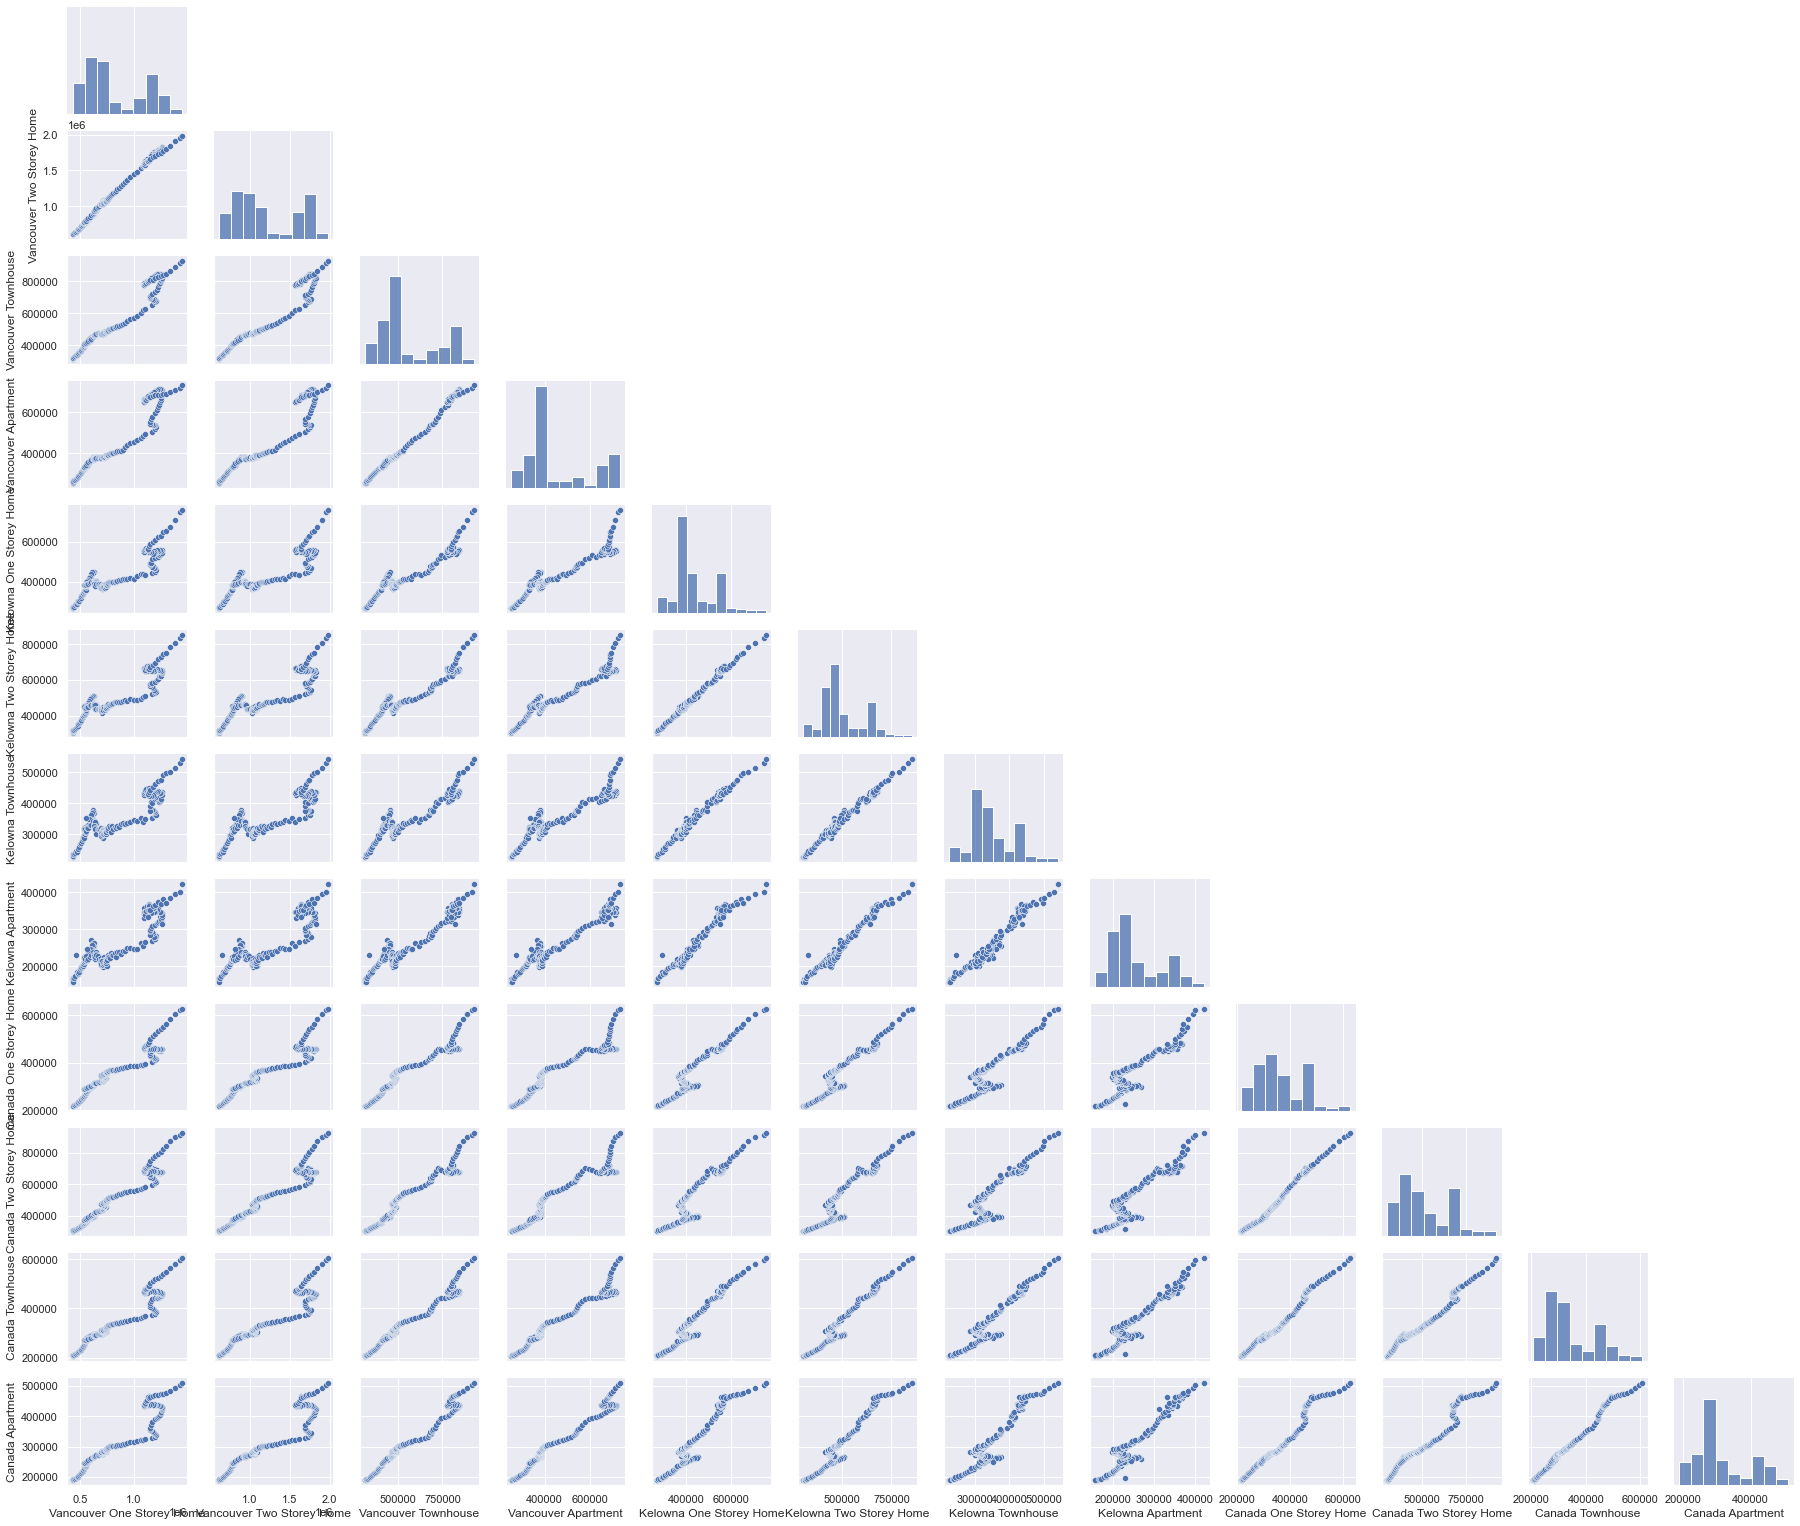

In [37]:
def size_widget(height=1.8, aspect=1.18):#these are the defaults for height and aspect
    sns.pairplot(housePrices_DF, corner=True, height=height, aspect=aspect)
interactive(size_widget, height=(1, 3.5, 0.2), aspect=(0.5, 2, 0.05))

In [38]:
housePrices_DF.columns

Index(['Vancouver One Storey Home', 'Vancouver Two Storey Home',
       'Vancouver Townhouse', 'Vancouver Apartment', 'Kelowna One Storey Home',
       'Kelowna Two Storey Home', 'Kelowna Townhouse', 'Kelowna Apartment',
       'Canada One Storey Home', 'Canada Two Storey Home', 'Canada Townhouse',
       'Canada Apartment'],
      dtype='object')

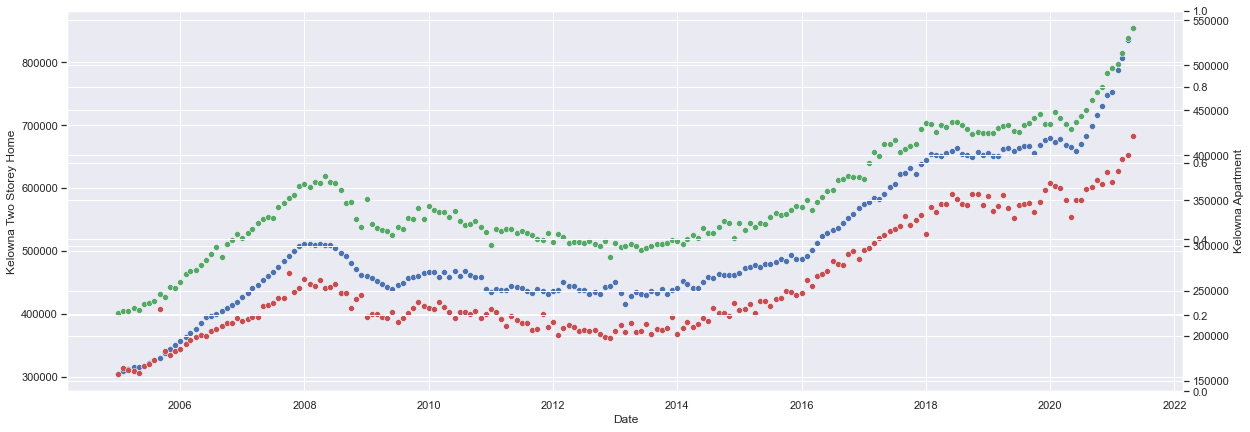

In [45]:
fig, ax = plt.subplots()
sns.scatterplot(x=housePrices_DF.index, y='Kelowna Two Storey Home', data=housePrices_DF, ax=ax)
ax2 = ax.twinx()
sns.scatterplot(x=housePrices_DF.index, y='Kelowna Apartment', data=housePrices_DF, ax=ax2, color='r')
ax3 = ax.twinx()
sns.scatterplot(x=housePrices_DF.index, y='Kelowna Townhouse', data=housePrices_DF, ax=ax2, color='g')
plt.show()

In [41]:
import matplotlib.pyplot as plt